# 1-я часть лабораторной - парсинг данных с новостного сайта nn.ru

In [1]:
# Установка необходимых библиотек
!apt-get update
!apt-get install -y chromium-chromedriver
!pip install selenium tqdm requests beautifulsoup4 pymystem3 json2xml atlas
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,306 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,640 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-upda

In [2]:
import json
import warnings
import tqdm
import time
import random

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

warnings.filterwarnings('ignore')

In [3]:
# Имя файла, в который будем сгружать ссылки и соответствующие категории новостных заголовков
links_filename = "links.txt"

### Функция для парсинга новостных заголовков

Входные параметры:
1. Базовый адрес до страницы с новостными заголовками всех категорий - `base_url`
2. Новостная категория, которая будет парситься - `category`
3. Кол-во страниц с новостями по одной категории - `pages`
4. Выходной файл, в который будут сохраняться ссылки и категории - `output`


In [ ]:
def parse_category_by_link(base_url, category, pages, output):
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')

    driver = webdriver.Chrome(options=chrome_options)
    driver.set_page_load_timeout(120)
    driver.implicitly_wait(10)

    print("Current session is {}".format(driver.session_id))

    for page in tqdm.trange(1, pages+1, desc=f"Category: {category}"):
        if page == 1:
            url = f"{base_url}/{category}/"
        else:
            url = f"{base_url}/{category}/page-{page}/"

        try:
            driver.get(url)
        except TimeoutException:
            print(f"Пропускаем страницу {url} по таймаута загрузки")
            continue

        print(f"Парсим страницу: {url}")
        time.sleep(random.uniform(1.0, 3.0))

        article_elements = driver.find_elements(By.CLASS_NAME, "content_fgrum")

        for element in article_elements:
            article_link = element.find_element(By.TAG_NAME, 'a').get_attribute('href')
            data = {
                'link': article_link,
                'category': category
            }
            with open(output, 'a', encoding='utf-8') as file:
                file.write(json.dumps(data, ensure_ascii=False) + '\n')

    driver.quit()

### Получение ссылок на новости различных категорий

Были выбраны 4-е категории: `город`, `еда`, `экономика` и `автомобили`. Для категорий `город`, `экономика` и `автомобили` больше 40 страниц с новостями, а вот для категории `еда` всего 27 страниц. По итогу общее кол-во записей с новостями будет ~4000

In [ ]:
# Можно распарсить и больше категорий, например, добавить категории world, education, business или politics
# Однако это будет достаточно времязатратно, поэтому остановился на минимальном варианте - 4 категории
categories = ['gorod', 'food', 'economics', 'auto']
web_link = 'https://www.nn.ru/text'

for cat in categories:
    parse_category_by_link(web_link, cat, 30, links_filename)

Current session is 483acc4fd211bb3062462b6700f78403


Category: gorod:   0%|          | 0/30 [00:00<?, ?it/s]

Парсим страницу: https://www.nn.ru/text/gorod/


Category: gorod:   3%|▎         | 1/30 [00:43<21:13, 43.91s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-2/


Category: gorod:   7%|▋         | 2/30 [00:51<10:24, 22.30s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-3/


Category: gorod:  10%|█         | 3/30 [00:59<07:11, 16.00s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-4/


Category: gorod:  13%|█▎        | 4/30 [01:08<05:45, 13.28s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-5/


Category: gorod:  17%|█▋        | 5/30 [01:17<04:54, 11.77s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-6/


Category: gorod:  20%|██        | 6/30 [01:25<04:07, 10.32s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-7/


Category: gorod:  23%|██▎       | 7/30 [01:45<05:10, 13.50s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-8/


Category: gorod:  27%|██▋       | 8/30 [01:53<04:23, 11.96s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-9/


Category: gorod:  30%|███       | 9/30 [02:01<03:42, 10.57s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-10/


Category: gorod:  33%|███▎      | 10/30 [02:10<03:22, 10.12s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-11/


Category: gorod:  37%|███▋      | 11/30 [02:18<03:00,  9.49s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-12/


Category: gorod:  40%|████      | 12/30 [02:27<02:46,  9.25s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-13/


Category: gorod:  43%|████▎     | 13/30 [02:34<02:25,  8.58s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-14/


Category: gorod:  47%|████▋     | 14/30 [02:41<02:11,  8.19s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-15/


Category: gorod:  50%|█████     | 15/30 [02:49<02:02,  8.18s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-16/


Category: gorod:  53%|█████▎    | 16/30 [02:58<01:55,  8.23s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-17/


Category: gorod:  57%|█████▋    | 17/30 [03:08<01:56,  8.96s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-18/


Category: gorod:  60%|██████    | 18/30 [03:17<01:46,  8.91s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-19/


Category: gorod:  63%|██████▎   | 19/30 [03:27<01:41,  9.23s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-20/


Category: gorod:  67%|██████▋   | 20/30 [03:34<01:26,  8.64s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-21/


Category: gorod:  70%|███████   | 21/30 [03:43<01:17,  8.64s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-22/


Category: gorod:  73%|███████▎  | 22/30 [03:51<01:07,  8.41s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-23/


Category: gorod:  77%|███████▋  | 23/30 [03:59<00:57,  8.28s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-24/


Category: gorod:  80%|████████  | 24/30 [04:06<00:48,  8.04s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-25/


Category: gorod:  83%|████████▎ | 25/30 [04:15<00:41,  8.33s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-26/


Category: gorod:  87%|████████▋ | 26/30 [04:24<00:33,  8.36s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-27/


Category: gorod:  90%|█████████ | 27/30 [04:33<00:25,  8.49s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-28/


Category: gorod:  93%|█████████▎| 28/30 [04:41<00:17,  8.54s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-29/


Category: gorod:  97%|█████████▋| 29/30 [04:49<00:08,  8.27s/it]

Парсим страницу: https://www.nn.ru/text/gorod/page-30/


Category: gorod: 100%|██████████| 30/30 [04:58<00:00,  9.95s/it]


Current session is 079b1f6e278dee8cb6098daf63cd7610


Category: food:   3%|▎         | 1/30 [02:00<58:00, 120.03s/it]

Пропускаем страницу https://www.nn.ru/text/food/ по таймаута загрузки
Парсим страницу: https://www.nn.ru/text/food/page-2/


Category: food:   7%|▋         | 2/30 [02:21<28:53, 61.90s/it] 

Парсим страницу: https://www.nn.ru/text/food/page-3/


Category: food:  10%|█         | 3/30 [02:31<17:14, 38.30s/it]

Парсим страницу: https://www.nn.ru/text/food/page-4/


Category: food:  13%|█▎        | 4/30 [02:38<11:13, 25.90s/it]

Парсим страницу: https://www.nn.ru/text/food/page-5/


Category: food:  17%|█▋        | 5/30 [02:47<08:18, 19.94s/it]

Парсим страницу: https://www.nn.ru/text/food/page-6/


Category: food:  20%|██        | 6/30 [02:54<06:12, 15.54s/it]

Парсим страницу: https://www.nn.ru/text/food/page-7/


Category: food:  23%|██▎       | 7/30 [03:03<05:04, 13.23s/it]

Парсим страницу: https://www.nn.ru/text/food/page-8/


Category: food:  27%|██▋       | 8/30 [03:13<04:27, 12.16s/it]

Парсим страницу: https://www.nn.ru/text/food/page-9/


Category: food:  30%|███       | 9/30 [03:21<03:53, 11.12s/it]

Парсим страницу: https://www.nn.ru/text/food/page-10/


Category: food:  33%|███▎      | 10/30 [03:31<03:31, 10.56s/it]

Парсим страницу: https://www.nn.ru/text/food/page-11/


Category: food:  37%|███▋      | 11/30 [03:40<03:11, 10.08s/it]

Парсим страницу: https://www.nn.ru/text/food/page-12/


Category: food:  40%|████      | 12/30 [03:49<02:57,  9.88s/it]

Парсим страницу: https://www.nn.ru/text/food/page-13/


Category: food:  43%|████▎     | 13/30 [03:57<02:39,  9.37s/it]

Парсим страницу: https://www.nn.ru/text/food/page-14/


Category: food:  47%|████▋     | 14/30 [04:06<02:28,  9.28s/it]

Парсим страницу: https://www.nn.ru/text/food/page-15/


Category: food:  50%|█████     | 15/30 [04:14<02:11,  8.74s/it]

Парсим страницу: https://www.nn.ru/text/food/page-16/


Category: food:  53%|█████▎    | 16/30 [04:24<02:07,  9.12s/it]

Парсим страницу: https://www.nn.ru/text/food/page-17/


Category: food:  57%|█████▋    | 17/30 [04:32<01:55,  8.91s/it]

Парсим страницу: https://www.nn.ru/text/food/page-18/


Category: food:  60%|██████    | 18/30 [04:42<01:47,  9.00s/it]

Парсим страницу: https://www.nn.ru/text/food/page-19/


Category: food:  63%|██████▎   | 19/30 [04:50<01:36,  8.74s/it]

Парсим страницу: https://www.nn.ru/text/food/page-20/


Category: food:  67%|██████▋   | 20/30 [04:59<01:27,  8.79s/it]

Парсим страницу: https://www.nn.ru/text/food/page-21/


Category: food:  70%|███████   | 21/30 [05:06<01:15,  8.35s/it]

Парсим страницу: https://www.nn.ru/text/food/page-22/


Category: food:  73%|███████▎  | 22/30 [05:14<01:05,  8.16s/it]

Парсим страницу: https://www.nn.ru/text/food/page-23/


Category: food:  77%|███████▋  | 23/30 [05:22<00:57,  8.20s/it]

Парсим страницу: https://www.nn.ru/text/food/page-24/


Category: food:  80%|████████  | 24/30 [05:29<00:47,  7.96s/it]

Парсим страницу: https://www.nn.ru/text/food/page-25/


Category: food:  83%|████████▎ | 25/30 [05:39<00:42,  8.43s/it]

Парсим страницу: https://www.nn.ru/text/food/page-26/


Category: food:  87%|████████▋ | 26/30 [05:47<00:33,  8.35s/it]

Парсим страницу: https://www.nn.ru/text/food/page-27/


Category: food:  90%|█████████ | 27/30 [05:55<00:24,  8.27s/it]

Парсим страницу: https://www.nn.ru/text/food/page-28/


Category: food:  93%|█████████▎| 28/30 [06:09<00:19,  9.87s/it]

Парсим страницу: https://www.nn.ru/text/food/page-29/


Category: food:  97%|█████████▋| 29/30 [06:20<00:10, 10.41s/it]

Парсим страницу: https://www.nn.ru/text/food/page-30/


Category: food: 100%|██████████| 30/30 [06:33<00:00, 13.11s/it]


Current session is ed646c82e24dd1435e7077e2ac6898f2


Category: economics:   0%|          | 0/30 [00:00<?, ?it/s]

Парсим страницу: https://www.nn.ru/text/economics/


Category: economics:   3%|▎         | 1/30 [01:14<36:07, 74.74s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-2/


Category: economics:   7%|▋         | 2/30 [01:23<16:50, 36.10s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-3/


Category: economics:  10%|█         | 3/30 [01:33<10:48, 24.02s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-4/


Category: economics:  13%|█▎        | 4/30 [01:41<07:37, 17.58s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-5/


Category: economics:  17%|█▋        | 5/30 [01:50<06:05, 14.62s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-6/


Category: economics:  20%|██        | 6/30 [01:59<05:06, 12.77s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-7/


Category: economics:  23%|██▎       | 7/30 [02:07<04:15, 11.09s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-8/


Category: economics:  27%|██▋       | 8/30 [02:17<03:55, 10.72s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-9/


Category: economics:  30%|███       | 9/30 [02:27<03:39, 10.44s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-10/


Category: economics:  33%|███▎      | 10/30 [02:36<03:20, 10.05s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-11/


Category: economics:  37%|███▋      | 11/30 [02:46<03:11, 10.10s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-12/


Category: economics:  40%|████      | 12/30 [02:55<02:55,  9.72s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-13/


Category: economics:  43%|████▎     | 13/30 [03:04<02:40,  9.47s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-14/


Category: economics:  47%|████▋     | 14/30 [03:12<02:24,  9.03s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-15/


Category: economics:  50%|█████     | 15/30 [03:21<02:14,  8.98s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-16/


Category: economics:  53%|█████▎    | 16/30 [03:30<02:06,  9.05s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-17/


Category: economics:  57%|█████▋    | 17/30 [03:37<01:50,  8.53s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-18/


Category: economics:  60%|██████    | 18/30 [03:47<01:48,  9.03s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-19/


Category: economics:  63%|██████▎   | 19/30 [03:54<01:32,  8.44s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-20/


Category: economics:  67%|██████▋   | 20/30 [04:04<01:27,  8.71s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-21/


Category: economics:  70%|███████   | 21/30 [04:14<01:22,  9.12s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-22/


Category: economics:  73%|███████▎  | 22/30 [04:21<01:08,  8.56s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-23/


Category: economics:  77%|███████▋  | 23/30 [04:30<01:01,  8.73s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-24/


Category: economics:  80%|████████  | 24/30 [04:39<00:53,  8.87s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-25/


Category: economics:  83%|████████▎ | 25/30 [04:49<00:45,  9.04s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-26/


Category: economics:  87%|████████▋ | 26/30 [05:00<00:39,  9.75s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-27/


Category: economics:  90%|█████████ | 27/30 [05:09<00:28,  9.53s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-28/


Category: economics:  93%|█████████▎| 28/30 [05:20<00:20, 10.00s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-29/


Category: economics:  97%|█████████▋| 29/30 [05:28<00:09,  9.32s/it]

Парсим страницу: https://www.nn.ru/text/economics/page-30/


Category: economics: 100%|██████████| 30/30 [05:39<00:00, 11.33s/it]


Current session is 475c3199d8c4a14f0b636db7a3729ac7


Category: auto:   0%|          | 0/30 [00:00<?, ?it/s]

Парсим страницу: https://www.nn.ru/text/auto/


Category: auto:   3%|▎         | 1/30 [00:16<08:08, 16.86s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-2/


Category: auto:   7%|▋         | 2/30 [00:27<06:05, 13.07s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-3/


Category: auto:  10%|█         | 3/30 [00:35<04:54, 10.89s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-4/


Category: auto:  13%|█▎        | 4/30 [00:44<04:25, 10.20s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-5/


Category: auto:  17%|█▋        | 5/30 [00:53<04:01,  9.68s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-6/


Category: auto:  23%|██▎       | 7/30 [03:01<17:24, 45.41s/it]

Пропускаем страницу https://www.nn.ru/text/auto/page-7/ по таймаута загрузки
Парсим страницу: https://www.nn.ru/text/auto/page-8/


Category: auto:  27%|██▋       | 8/30 [03:17<13:12, 36.01s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-9/


Category: auto:  30%|███       | 9/30 [05:15<21:33, 61.61s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-10/


Category: auto:  33%|███▎      | 10/30 [05:30<15:47, 47.38s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-11/


Category: auto:  37%|███▋      | 11/30 [07:30<21:59, 69.45s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-12/


Category: auto:  40%|████      | 12/30 [07:48<16:05, 53.66s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-13/


Category: auto:  43%|████▎     | 13/30 [07:54<11:11, 39.52s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-14/


Category: auto:  47%|████▋     | 14/30 [08:03<08:01, 30.10s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-15/


Category: auto:  50%|█████     | 15/30 [08:11<05:50, 23.37s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-16/


Category: auto:  53%|█████▎    | 16/30 [08:18<04:18, 18.48s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-17/


Category: auto:  57%|█████▋    | 17/30 [08:26<03:21, 15.52s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-18/


Category: auto:  60%|██████    | 18/30 [08:34<02:37, 13.15s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-19/


Category: auto:  63%|██████▎   | 19/30 [08:43<02:11, 11.94s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-20/


Category: auto:  67%|██████▋   | 20/30 [08:50<01:45, 10.50s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-21/


Category: auto:  70%|███████   | 21/30 [08:59<01:28,  9.83s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-22/


Category: auto:  73%|███████▎  | 22/30 [09:05<01:11,  8.97s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-23/


Category: auto:  77%|███████▋  | 23/30 [09:13<01:00,  8.59s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-24/


Category: auto:  80%|████████  | 24/30 [09:21<00:50,  8.36s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-25/


Category: auto:  83%|████████▎ | 25/30 [09:28<00:40,  8.05s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-26/


Category: auto:  87%|████████▋ | 26/30 [09:37<00:33,  8.34s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-27/


Category: auto:  90%|█████████ | 27/30 [09:45<00:24,  8.27s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-28/


Category: auto:  93%|█████████▎| 28/30 [09:53<00:16,  8.13s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-29/


Category: auto:  97%|█████████▋| 29/30 [10:00<00:07,  7.81s/it]

Парсим страницу: https://www.nn.ru/text/auto/page-30/


Category: auto: 100%|██████████| 30/30 [10:08<00:00, 20.29s/it]


Сохраним все полученные данные в список `posts` для последующего удобства

In [8]:
posts = []
with open(links_filename) as file:
    for line in file:
        posts.append(json.loads(line))

print(len(posts))
posts[:10]

4581


[{'link': 'https://www.nn.ru/text/gorod/2025/01/25/75030323/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/25/75021380/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/25/75029612/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/25/75029900/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/25/75029804/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/25/75025523/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/24/75027851/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/24/75025793/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/24/75024089/',
  'category': 'gorod'},
 {'link': 'https://www.nn.ru/text/gorod/2025/01/24/75023165/',
  'category': 'gorod'}]

### Получение текста из сохраненных новостных заголовков и сохранения в json

In [5]:
!pip install html2text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for html2text: filename=html2text-2024.2.26-py3-none-any.whl size=33111 sha256=ef4695350cf06dc2c00cba75255863279bc3ba416b532e09b006e4f99a92854a
  Stored in directory: /root/.cache/pip/wheels/23/58/7c/d9c8c4d924a1ac2b621add1b2c1d30b639629a33cfdfde6a45
Successfully built html2text


In [6]:
import codecs
import requests
import html2text

from bs4 import BeautifulSoup

Теперь получим и сохраним в json файл необходимую для нас информацию по новостям.
`Json` файл будет иметь следующую структуру:
```
[
  "catalog": {
    {
      link: string,
      category: string,
      tags: list,
      text: string
    }
  }
]
```

In [9]:
from concurrent.futures import ThreadPoolExecutor


def fetch_with_retries(url, retries=3, delay=1):
    """Функция для выполнения запроса с повторными попытками"""
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    for attempt in range(retries):
        try:
            response = requests.get(url, headers=headers, timeout=20)
            response.raise_for_status()
            return response
        except (requests.exceptions.RequestException, requests.exceptions.ConnectionError) as e:
            print(f"Ошибка запроса {url}: {e}. Попытка {attempt + 1} из {retries}.")
            time.sleep(delay)
    return None


def process_post(element):
    """Обрабатывает один пост, извлекая текст и теги"""
    try:
        time.sleep(0.5)

        response = fetch_with_retries(element['link'])
        if response is None:
            print(f"Не удалось получить данные для {element['link']}. Пропускаем")
            return None

        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text, "html.parser")

        title = html2text.html2text(soup.find('h1', class_='title_ip27z').text).replace('\n', ' ')

        text = ''
        for paragraph in soup.findAll('div', class_='uiArticleBlockText_g83x5 text-style-body-1 c-text block_fefJj'):
            paragraph_text = html2text.html2text(paragraph.text).replace('\n', ' ')
            text += paragraph_text + ' '

        tags = [
            html2text.html2text(tag.text).replace('\n', '')
            for tag in soup.findAll('a', class_="tag_NjOWL lg_NjOWL gray_NjOWL text-style-ui-caption-3")
        ]

        return {
            "article_id": element['link'],
            "title": title,
            "category": element['category'],
            "tags": tags,
            "text": text.strip()
        }

    except Exception as e:
        print(f"Ошибка обработки {element['link']}: {e}")
        return None



def main(posts, output_file):
  """Обрабатывает все посты из входного файла и сохраняет результат в выходной файл"""

  results = []
  with ThreadPoolExecutor(max_workers=10) as executor:
    for result in tqdm.tqdm(executor.map(process_post, posts), total=len(posts)):
      if result is not None:
          results.append(result)

          output_data = {
              'catalog': results
          }

          with open(output_file, 'w', encoding='utf-8') as file:
              json.dump(output_data, file, ensure_ascii=False, indent=4)

In [10]:
main(posts, "/content/nn_news.json")

  3%|▎         | 157/4581 [00:43<24:26,  3.02it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/12/28/74942300/?erid=2SDnjdTmqZ5: 'NoneType' object has no attribute 'text'


  4%|▍         | 198/4581 [00:51<17:49,  4.10it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/12/24/74913926/?erid=2SDnjdoYDco: 'NoneType' object has no attribute 'text'


 19%|█▊        | 849/4581 [03:04<13:30,  4.60it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/08/27/74009039/?erid=2SDnjekQ41p: 'NoneType' object has no attribute 'text'


 19%|█▊        | 855/4581 [03:05<10:20,  6.00it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/08/30/74029202/: 'NoneType' object has no attribute 'text'


 19%|█▉        | 864/4581 [03:07<12:32,  4.94it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/08/28/74016134/?erid=2SDnjdZhjni: 'NoneType' object has no attribute 'text'


 19%|█▉        | 870/4581 [03:09<17:31,  3.53it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/08/27/74009039/?erid=2SDnjekQ41p: 'NoneType' object has no attribute 'text'


 20%|█▉        | 896/4581 [03:13<08:05,  7.58it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/08/22/73990706/?erid=2SDnjdU6Fce: 'NoneType' object has no attribute 'text'


 20%|█▉        | 902/4581 [03:15<12:57,  4.73it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/08/22/73987697/?erid=2SDnjf2dYQ2: 'NoneType' object has no attribute 'text'


 21%|██▏       | 980/4581 [03:31<10:37,  5.64it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/08/09/73942268/?erid=2SDnjcdDL6v: 'NoneType' object has no attribute 'text'


 28%|██▊       | 1305/4581 [04:54<09:25,  5.79it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/07/12/73817642/?erid=2SDnjcZysFp: 'NoneType' object has no attribute 'text'


 29%|██▉       | 1339/4581 [05:05<32:09,  1.68it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/06/12/73696412/?erid=2SDnjeipbn2: 'NoneType' object has no attribute 'text'


 29%|██▉       | 1348/4581 [05:07<08:34,  6.29it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/04/27/73519034/?erid=2SDnjeZXDGV: 'NoneType' object has no attribute 'text'


 31%|███       | 1402/4581 [05:23<06:22,  8.31it/s]

Ошибка обработки https://www.nn.ru/text/longread/2023/12/27/73064255/?erid=2SDnjcF4Yic: 'NoneType' object has no attribute 'text'


 32%|███▏      | 1478/4581 [05:38<08:18,  6.22it/s]

Ошибка обработки https://www.nn.ru/text/longread/2023/09/07/72682337/: 'NoneType' object has no attribute 'text'


 39%|███▉      | 1784/4581 [07:06<14:19,  3.25it/s]

Ошибка обработки https://www.nn.ru/text/food/: 'NoneType' object has no attribute 'text'


 43%|████▎     | 1992/4581 [08:21<16:46,  2.57it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/12/28/74942300/?erid=2SDnjdTmqZ5: 'NoneType' object has no attribute 'text'


 44%|████▍     | 2008/4581 [08:27<21:14,  2.02it/s]

Ошибка обработки https://www.nn.ru/text/economics/: 'NoneType' object has no attribute 'text'


 45%|████▍     | 2039/4581 [08:37<09:00,  4.70it/s]

Ошибка обработки https://www.nn.ru/text/longread/2024/11/28/74386970/?erid=2SDnjccuYoD: 'NoneType' object has no attribute 'text'


 45%|████▍     | 2059/4581 [08:44<09:02,  4.65it/s]

Ошибка запроса https://www.nn.ru/text/economics/2024/11/13/74326268/: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')). Попытка 1 из 3.
Ошибка запроса https://www.nn.ru/text/economics/2024/11/12/74324252/: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')). Попытка 1 из 3.
Ошибка запроса https://www.nn.ru/text/economics/2024/11/13/74329931/: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')). Попытка 1 из 3.
Ошибка запроса https://www.nn.ru/text/economics/2024/11/14/74331185/: ('Connection broken: IncompleteRead(15555 bytes read, 55552 more expected)', IncompleteRead(15555 bytes read, 55552 more expected)). Попытка 1 из 3.


 62%|██████▏   | 2858/4581 [15:17<19:57,  1.44it/s]

Ошибка обработки https://www.nn.ru/text/longread/2020/12/01/69587973/: 'NoneType' object has no attribute 'text'


100%|██████████| 4581/4581 [26:16<00:00,  2.91it/s]


При получении ссылок на статьи в выборку попались еще страницы с неизвестной категорией `longread`, поэтому при попытке извлечь данные из таких страниц мы получали ошибки. Также были проблемы с соединением, но после повторных запросов распарсить страницы все же удалось. Как итог мы получили ~4500 статьи

In [13]:
import pandas as pd

with open('/content/nn_news.json', 'r', encoding='utf-8') as file:
  data = json.load(file)

data = pd.json_normalize(data['catalog'])

In [14]:
data

,article_id,title,category,tags,text
0,https://www.nn.ru/text/gorod/2025/01/25/75030323/,Два десятка новых заводов откроют в Нижегородс...,gorod,"[Нижний Новгород, Город, Производство]",До конца текущего года в Нижегородской области...
1,https://www.nn.ru/text/gorod/2025/01/25/75021380/,С миру по нитке. Как сделать Нижегородскую обл...,gorod,"[Краудфандинг, Проекты]",В последние годы краудфандинг стал важным инст...
2,https://www.nn.ru/text/gorod/2025/01/25/75029612/,От разрухи и порта — в любимое место города. К...,gorod,[Стрелка в Нижнем Новгороде],В Нижнем Новгороде две могучие реки — Волга и ...
3,https://www.nn.ru/text/gorod/2025/01/25/75029900/,Нижегородка подала в суд на Бари Алибасова. Он...,gorod,"[Нижний Новгород, Город, Бари алибасов-младший]",Ленинский районный суд Нижнего Новгорода начал...
4,https://www.nn.ru/text/gorod/2025/01/25/75029804/,Учителя «Школы 800» в Нижнем Новгороде сообщил...,gorod,"[Нижний Новгород, Город, Школа]",Преподаватели нижегородской «Школы 800» обрати...
...,...,...,...,...,...
4557,https://www.nn.ru/text/auto/2019/05/13/66082990/,ПДД для бывалых: когда чревато включать заднюю,auto,"[Закон, Ликбез]","За это нарушение редко штрафует ГИБДД, но част..."
4558,https://www.nn.ru/text/auto/2019/05/11/66084676/,"Автолюбитель, который смог: нижегородец выигра...",auto,"[Александр Барамонов, Верховный суд РФ, Водите...","Автолюбитель из Нижнего Новгорода сделал, каза..."
4559,https://www.nn.ru/text/auto/2019/05/11/66082771/,"Как бы кроссовер: тест-драйв легковушки KIA, к...",auto,"[KIA Rio X-Line, Тест-драйв, Новые авто]","Проверяем в деле корейский хетчбэк, который оч..."
4560,https://www.nn.ru/text/auto/2019/05/08/66080872/,Как в фильмах про войну: катаемся на внедорожн...,auto,"[ГАЗ, Внедорожник, Горьковский автозавод, Ретр...",Чем отличаются современные внедорожники от тех...


Как видим, общее кол-во статей, которые удалось распарсить, равняется 4581

# 2-я часть лабораторной работы - предобработка данных, векторизация и обучение моделей

In [15]:
!pip install nltk razdel pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 85.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=9a5b18c36ac15c7132735b00b99641b9ff4a83b187f661a849e2ffb8a895f760
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [16]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from pprint import pprint
tqdm.pandas()

import spacy
import unicodedata
from scipy import stats
from string import punctuation
from collections import Counter

import re
from bs4 import BeautifulSoup

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import nltk
import nltk.corpus
from razdel import tokenize
from pymorphy2 import MorphAnalyzer

nltk.download('punkt_tab')
nltk.download('stopwords')

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Необходимые функции

Реализуем функции для "очистки" текста

In [17]:
def remove_stopwords(text, is_lower_case=False, stopwords=None):
  if not stopwords:
    stopwords = nltk.corpus.stopwords.words('russian')
  tokens = nltk.word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopwords]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

def lemmatize_text(text):
  tokens = nltk.word_tokenize(text)
  lemmas = []
  for token in tokens:
    parsed_token = MorphAnalyzer().parse(token)[0]
    lemma = parsed_token.normal_form if parsed_token.normal_form != '-PRON-' else token
    lemmas.append(lemma)
  lemmatized_text = ' '.join(lemmas)
  return lemmatized_text

def stemming(text):
  text = ' '.join([snow.stem(word) for word in text.split()])
  return text

def remove_special_characters(text, remove_digits=False):
  pattern = r'[^а-яА-Я0-9\s]' if not remove_digits else r'[^а-яА-Я\s]'
  text = re.sub(pattern, '', text)
  return text

Функция, которая будет выполнять обработку входящего текста

In [18]:
def text_pre_processor(text,
                       text_lower_case=True, text_stemming=False,
                       text_lemmatization=True, special_char_removal=True,
                       remove_digits=True, stopword_removal=True,
                       stopword_list=None):
  if special_char_removal:
    special_char_pattern = re.compile(r'([{.(-)!}])')
    text = special_char_pattern.sub(" \\1 ", text)
    text = remove_special_characters(text, remove_digits=remove_digits)

  if text_lemmatization:
    text = lemmatize_text(text)

  if text_stemming and not text_lemmatization:
    text = stemming(text)

  if text_lower_case:
    text = text.lower()

  if stopword_removal:
    text = remove_stopwords(text, is_lower_case=text_lower_case,
                                stopwords=stopword_list)

  text = re.sub(' +', ' ', text)
  return text

In [19]:
stop_words = nltk.corpus.stopwords.words('russian')+['это', 'также', 'абдо']
snow = nltk.stem.SnowballStemmer(language="russian")

### Предобработка данных

In [20]:
def replace_category(text):
  if text == 'gorod':
    return 'Город'
  if text == 'economics':
    return 'Экономика'
  if text == 'auto':
    return 'Автомобили'
  if text == 'food':
    return 'Еда'

Запишем правильным образом теги, а также переведем названия категорий на русский

In [21]:
data['tags'] = data.tags.apply(lambda x: ", ".join(x))
data['category'] = data.category.apply(replace_category)

In [22]:
print(f"Shape is: {data.shape}")

data.head(5)

Shape is: (4562, 5)


,article_id,title,category,tags,text
0,https://www.nn.ru/text/gorod/2025/01/25/75030323/,Два десятка новых заводов откроют в Нижегородс...,Город,"Нижний Новгород, Город, Производство",До конца текущего года в Нижегородской области...
1,https://www.nn.ru/text/gorod/2025/01/25/75021380/,С миру по нитке. Как сделать Нижегородскую обл...,Город,"Краудфандинг, Проекты",В последние годы краудфандинг стал важным инст...
2,https://www.nn.ru/text/gorod/2025/01/25/75029612/,От разрухи и порта — в любимое место города. К...,Город,Стрелка в Нижнем Новгороде,В Нижнем Новгороде две могучие реки — Волга и ...
3,https://www.nn.ru/text/gorod/2025/01/25/75029900/,Нижегородка подала в суд на Бари Алибасова. Он...,Город,"Нижний Новгород, Город, Бари алибасов-младший",Ленинский районный суд Нижнего Новгорода начал...
4,https://www.nn.ru/text/gorod/2025/01/25/75029804/,Учителя «Школы 800» в Нижнем Новгороде сообщил...,Город,"Нижний Новгород, Город, Школа",Преподаватели нижегородской «Школы 800» обрати...


In [23]:
data.iloc[13]

,13
article_id,https://www.nn.ru/text/gorod/2025/01/23/75021089/
title,Высотку планируют построить напротив сквера в ...
category,Город
tags,"Строительство, Дом"
text,13-этажный жилой дом планируют возвести на ули...


Как мы можем заметить, всего мы получили 4581 новостную статью. Давайте посмотрим информацию о собранном датасете чуть детальнее

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  4562 non-null   object
 1   title       4562 non-null   object
 2   category    4562 non-null   object
 3   tags        4562 non-null   object
 4   text        4562 non-null   object
dtypes: object(5)
memory usage: 178.3+ KB


In [25]:
data.isna().sum()

,0
article_id,0
title,0
category,0
tags,0
text,0


Также можем заметить, что у нас нет пустых значений ни в одном из столбцов

In [27]:
data.iloc[0, 4]

'До конца текущего года в Нижегородской области могут открыть порядка 20 новых предприятий. Об этом GiperNN рассказал замгубернатора региона Андрей Саносян.   Четыре производства должно появиться в особой экономической зоне «Кулибин» в Дзержинске, где на текущий момент функционирует 36 компаний-резидентов. Несмотря на сложные экономические условия, никто из них не намерен сворачивать производство, утверждает Саносян. Даже наоборот — есть намерения расширять ОЭЗ за счет территории на Бору на площади почти в 130 гектаров. Там в том числе намерены создать речной грузовой порт. Около 20 компаний рассчитывают реализовать проекты. 11 из них фактически готовы стать резидентами.   — Новые предприятия продолжат открываться, предпосылок к существенному сокращению рынка нет, — заявил Саносян.   По его словам, с новыми производствами появится около 1600 рабочих мест. При этом в условиях дефицита кадров предприниматели делают ставку не на большое количество сотрудников, а на высокую производительно

category
Экономика     1197
Город         1191
Автомобили    1159
Еда           1015
Name: count, dtype: int64


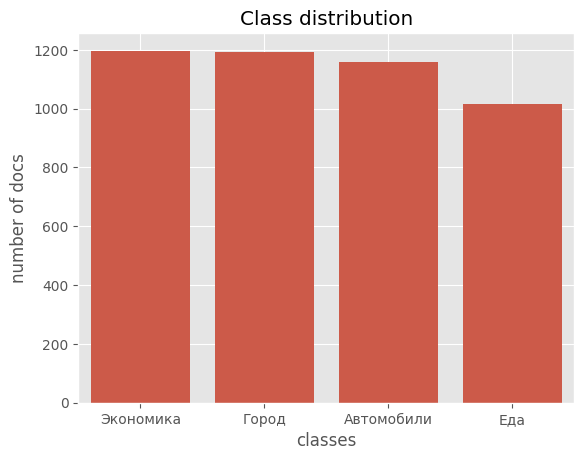

In [28]:
v_counts = data['category'].value_counts()
print(v_counts)

ax = sns.barplot(x=v_counts.index, y=v_counts.values)
ax.grid(True)
ax.set(xlabel='classes', ylabel='number of docs', title='Сlass distribution')
plt.show()

У нас есть 4 категории, по которым мы классифицируем. Наш датасет относительно сбалансированный, но можем обрезать кол-во данных до 1015 для каждой категории, чтобы был сбалансирован по кол-ву статей

In [29]:
df_grouped = data.groupby('category')
data = df_grouped.apply(lambda x: x.sample(n=min(len(x), 1015), random_state=1)).reset_index(drop=True)

data

,article_id,title,category,tags,text
0,https://www.nn.ru/text/auto/2020/04/10/69083095/,Поднимаемся с колен: автозаводы России вернули...,Автомобили,"АВТОВАЗ, Автопром, Авторынок",После многодневного простоя ряд крупных автоза...
1,https://www.nn.ru/text/auto/2024/02/29/73276940/,Метать «Искру». АВТОВАЗ анонсировал презентаци...,Автомобили,"Лада, АВТОВАЗ, Автопром, Авторынок","Глава АВТОВАЗа Максим Соколов объявил, что в б..."
2,https://www.nn.ru/text/auto/2020/01/17/66448411/,"Рестайлинг Lada 4x4: важное обновление, о кото...",Автомобили,"Niva, Лада, Lada 4Х4, АВТОВАЗ, Внедорожник",АВТОВАЗ начал продажи обновленной версии Lada ...
3,https://www.nn.ru/text/auto/2020/07/06/69348352/,Средство без запаха: наблюдаем эволюцию чайнак...,Автомобили,"Тест-драйв, Авторынок, Changan",Начало 2020 года для российского авторынка ста...
4,https://www.nn.ru/text/auto/2022/07/08/71470934/,15 тысяч за окурок? Кого и как будут штрафоват...,Автомобили,"Мусор, Водитель, Закон, Автомобиль",Госдума приняла в третьем чтении закон о попра...
...,...,...,...,...,...
4055,https://www.nn.ru/text/economics/2023/12/14/73...,Путин извинился за цены на яйца,Экономика,"Владимир Путин, Цены, Цены на яйца, Цены на пр...",Владимир Путин сегодня отвечает на вопросы жур...
4056,https://www.nn.ru/text/economics/2023/12/04/72...,«Инфляцию пока обуздать не удается». Сохранит ...,Экономика,"Ключевая ставка, Центробанк России, Инфляция, ...","Годовая инфляция к 20 ноября составила 7,28%, ..."
4057,https://www.nn.ru/text/economics/2023/10/17/72...,Как из-за земельного участка могут лишить посо...,Экономика,"Дети, Семьи с детьми, Выплаты и пособия, Едино...",В течение последних нескольких лет в России не...
4058,https://www.nn.ru/text/economics/2022/10/12/71...,Евро в третий раз за год упал ниже доллара. По...,Экономика,"Валюта, Доллар, Евро, Рубль, Курс валют",В последние дни в ходе торгов на Мосбирже курс...


category
Автомобили    1015
Город         1015
Еда           1015
Экономика     1015
Name: count, dtype: int64


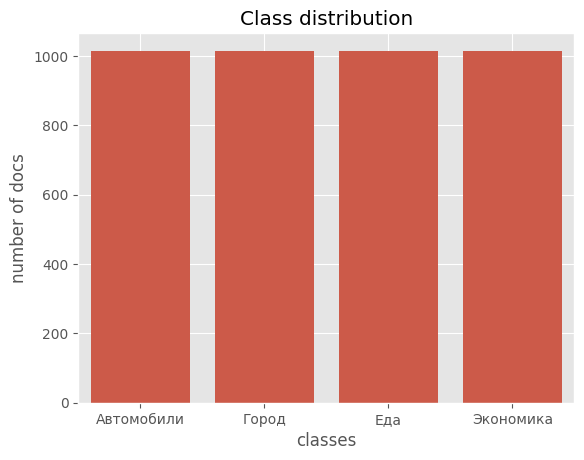

In [30]:
v_counts = data['category'].value_counts()
print(v_counts)

ax = sns.barplot(x=v_counts.index, y=v_counts.values)
ax.grid(True)
ax.set(xlabel='classes', ylabel='number of docs', title='Сlass distribution')
plt.show()

### Базовые статистики на основе текста

Посчитаем некоторые статистики, а имеено: длину текста, кол-во слов, различные знаки препинания, капслоковые слова

In [31]:
def n_punct(text):
  counter = Counter(c for line in text for c in line if c in punctuation)
  return sum(counter.values())

def calculate_stats(text_df):
  stats = pd.DataFrame()
  stats['len'] = text_df.apply(lambda x: len(x))
  stats['n_words'] = text_df.apply(lambda x: len(re.findall(r'\w+', x)))
  stats['n_uppercase'] = text_df.apply(lambda x: len(re.findall(r'\b[A-Z]{2,}\b', x)))
  stats['uppercase_ratio'] = stats['n_uppercase'] / (stats['n_words'] + 1e-09)

  stats['n_punct'] = text_df.apply(n_punct)
  stats['n_points'] = text_df.apply(lambda x: x.count('.'))
  stats['points_ratio'] = stats['n_points'] / (stats['n_punct'] + 1e-09)
  stats['n_exclamation'] = text_df.apply(lambda x: x.count('!'))
  stats['exclamation_ratio'] = stats['n_exclamation'] / (stats['n_punct'] + 1e-09)
  return stats

In [32]:
%%time
stats = calculate_stats(data['text'])
stats = stats[['n_words', 'uppercase_ratio', 'points_ratio', 'exclamation_ratio']]

CPU times: user 2.9 s, sys: 8.94 ms, total: 2.9 s
Wall time: 2.91 s


In [33]:
city_ind = data[data['category']=='Город'].index.tolist()
food_ind = data[data['category']=='Еда'].index.tolist()
econom_ind = data[data['category']=='Экономика'].index.tolist()
auto_ind = data[data['category']=='Автомобили'].index.tolist()

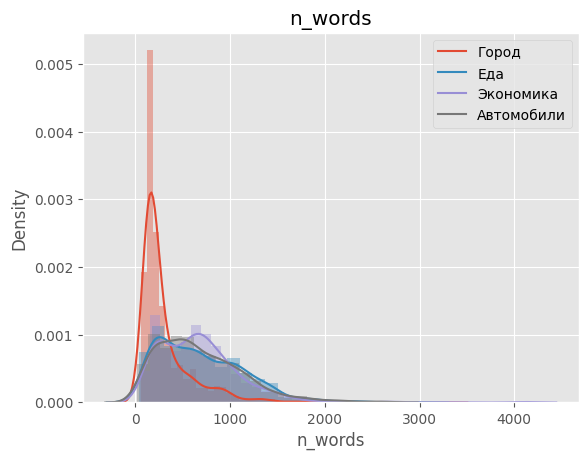

None

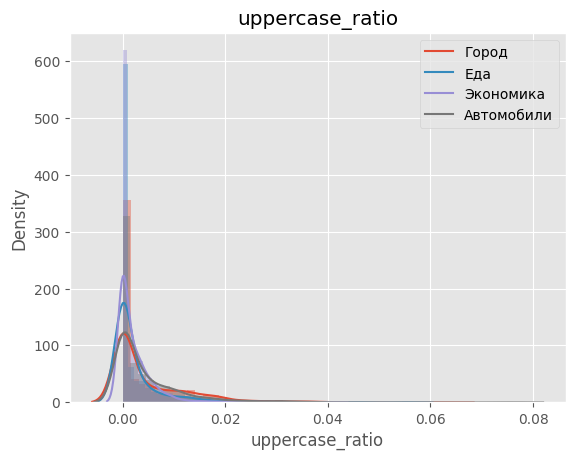

None

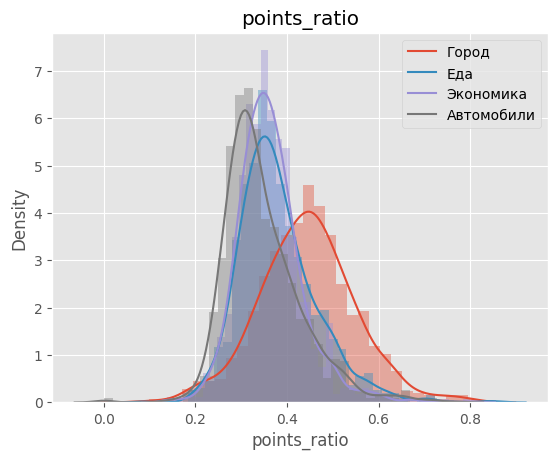

None

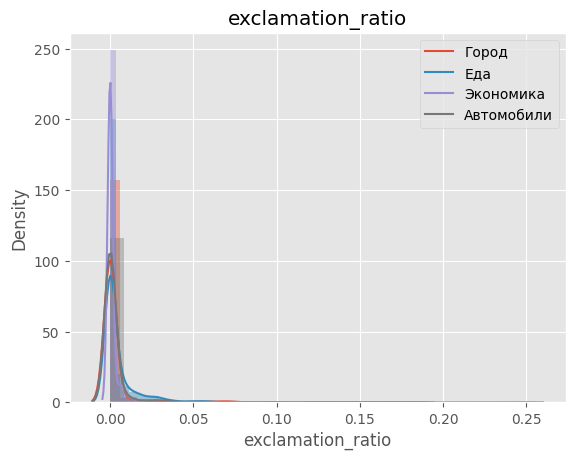

None

In [34]:
for stat in stats.columns:
    sns.distplot(stats[stat][city_ind])
    sns.distplot(stats[stat][food_ind])
    sns.distplot(stats[stat][econom_ind])
    sns.distplot(stats[stat][auto_ind])

    plt.title(stat)
    plt.legend(['Город', 'Еда', 'Экономика', 'Автомобили'])
    display(plt.show())

Видно, что только распределение точек во всех категориях примерно одинаковое. Остальные признаки можно использовать для `feature-engineering`

### Облако слов

Для иллюстрации нарисуем вордклауды для каждой каждой категории

In [35]:
def cloud(data, stop_words, ngram_range=(1,1), n_words=50, class_=''):
  vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words)
  counts_pos = vectorizer.fit_transform(data[data['category']==class_]['text'])
  sum_words = counts_pos.sum(axis=0)

  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  wordCloud_pos = WordCloud(max_words=n_words, background_color = 'green',
                            height=500, width=750)
  wordCloud_pos.generate_from_frequencies(dict(words_freq))

  plt.imshow(wordCloud_pos)
  plt.grid(False)
  plt.title(class_)
  plt.show()

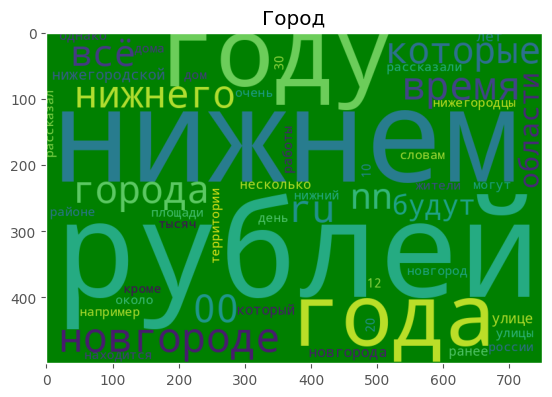

None

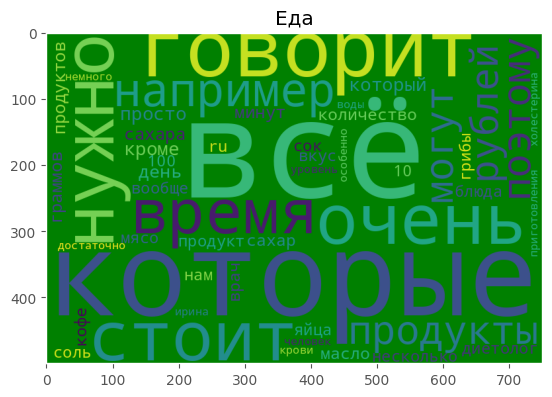

None

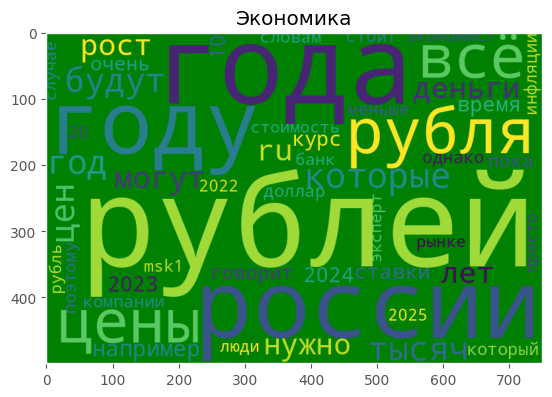

None

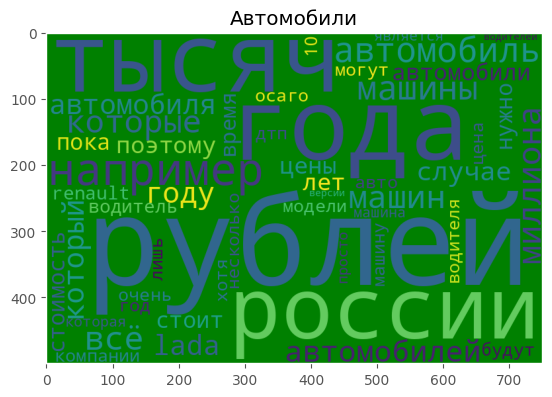

None

In [36]:
display(cloud(data, stop_words+['не', 'нет'], ngram_range=(1,1), n_words=50, class_ = 'Город'))
display(cloud(data, stop_words+['не', 'нет'], ngram_range=(1,1), n_words=50, class_ = 'Еда'))
display(cloud(data, stop_words+['не', 'нет'], ngram_range=(1,1), n_words=50, class_ = 'Экономика'))
display(cloud(data, stop_words+['не', 'нет'], ngram_range=(1,1), n_words=50, class_ = 'Автомобили'))



### Препроцессинг

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'],
                                                    data['category'],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=data['category'])

In [ ]:
train = X_train.to_frame().join(y_train)
print(train.shape)
print(train['category'].value_counts())

train['category'] =  train["category"].astype('category')
train["class"] = train["category"].cat.codes
train

(2858, 2)
category
Экономика     715
Автомобили    715
Город         714
Еда           714
Name: count, dtype: int64


,text,category,class
3117,Центробанк на прошлой неделе сохранил ключевую...,Экономика,3
3355,"Выплаты по уходу за ребенком до 1,5 года, кото...",Экономика,3
955,Цена седана Lada Vesta в зависимости от компле...,Автомобили,0
1735,"Замгубернатора Сергей Морозов проверил, как ид...",Город,1
645,"Продолжаем рассказывать об автомобилях, которы...",Автомобили,0
...,...,...,...
812,Хозяин популярного в России китайского электро...,Автомобили,0
692,В мае 2024 года средний автомобильный кредит в...,Автомобили,0
407,Компания Volkswagen опубликовала первые изобра...,Автомобили,0
134,Стоимость новой зимней резины за год выросла н...,Автомобили,0


In [ ]:
test = X_test.to_frame().join(y_test)
print(test.shape)
print(test['category'].value_counts())

test['category'] =  test["category"].astype('category')
test["class"] = test["category"].cat.codes
test.head()

(1226, 2)
category
Город         307
Еда           307
Автомобили    306
Экономика     306
Name: count, dtype: int64


,text,category,class
311,"В Нижнем Новгороде, как и по всей России, с се...",Автомобили,0
1970,Уроженец Узбекистана на эмоциях чуть не сжег д...,Город,1
832,В Госдуме приняли в третьем (окончательном) чт...,Автомобили,0
3029,Портал NN.RU продолжает следить за приключения...,Еда,2
343,"Все активы Nissan в России, включая завод в Са...",Автомобили,0


Почистим наши данные

In [ ]:
%%time
train['clean'] = train['text'].progress_apply(text_pre_processor,
                                             text_lower_case=True,
                                             text_stemming=False,
                                             text_lemmatization=False,
                                             special_char_removal=True,
                                             remove_digits=True,
                                             stopword_removal=True,
                                             stopword_list=stop_words)

100%|██████████| 2858/2858 [00:10<00:00, 272.15it/s]

CPU times: user 10.3 s, sys: 50.5 ms, total: 10.3 s
Wall time: 10.5 s


In [ ]:
%%time
test['clean'] = test['text'].progress_apply(text_pre_processor,
                                             text_lower_case=True,
                                             text_stemming=False,
                                             text_lemmatization=False,
                                             special_char_removal=True,
                                             remove_digits=True,
                                             stopword_removal=True,
                                             stopword_list=stop_words)

100%|██████████| 1226/1226 [00:03<00:00, 313.21it/s]

CPU times: user 3.88 s, sys: 23.5 ms, total: 3.91 s
Wall time: 3.92 s


### Bag of Words

In [ ]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 18000,
                             min_df = 2,
                             ngram_range = (1,3))

In [ ]:
%%time
train_bw = vectorizer.fit_transform(train['clean'])
test_bw = vectorizer.transform(test['clean'])

print('train dim:', train_bw.shape, 'test dim:', test_bw.shape)

train dim: (2858, 18000) test dim: (1226, 18000)
CPU times: user 12.2 s, sys: 487 ms, total: 12.6 s
Wall time: 12.7 s


In [ ]:
f_names = vectorizer.get_feature_names_out()
train_sum = pd.DataFrame(np.sum(train_bw, axis=0), columns=f_names)
train_sum.head()

,абонемент,абс,абс подушек,абсолютно,абсолютно поразному,абсолютно поразному рассмотрены,абхазии,ав,аварии,аварий,...,ярких,ярко,ярко выраженным,ярмарка,ярмарке,ярмарки,ярослав,ярославской,ясно,ящик
0,17,86,12,162,13,13,12,14,172,54,...,21,36,12,28,18,23,30,12,27,13


### TF-IDF

In [ ]:
tFvectorizer = TfidfVectorizer(ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 100000)

In [ ]:
%%time
train_tv = tFvectorizer.fit_transform(train['clean'])
test_tv = tFvectorizer.transform(test['clean'])

vocab = tFvectorizer.get_feature_names_out()
print('Training dim:',train_tv.shape, 'Test dim:', test_tv.shape)

Training dim: (2858, 100000) Test dim: (1226, 100000)
CPU times: user 12.7 s, sys: 276 ms, total: 13 s
Wall time: 13.7 s


In [ ]:
dist = np.sum(train_tv, axis=0)
checking = pd.DataFrame(dist, columns=vocab)
checking

,аб,аб инбев,аб инбев эфес,аббревиатура,абел,абел аганбегян,абонемент,абонемента,абонементы,абонентам,...,ячневая,ячневая каша,ячневой,ячневой крупы,ячневую,ящик,ящиками,ящике,ящики,ящиков
0,0.251144,0.172778,0.172778,0.274861,0.123101,0.123101,0.695207,0.214564,0.152917,0.194225,...,0.166267,0.095759,0.272335,0.138719,0.109263,0.597238,0.180917,0.173003,0.383034,0.253404


### Моделирование

Добавим кросс-валидацию

In [ ]:
kfold = StratifiedKFold(n_splits = 5, random_state = 2018 , shuffle=True)
models = {}

### Logistic Regression

In [ ]:
def LR_model(train_data, train_labels, param):
  lr = LogisticRegression(random_state=42)
  gs_lr = GridSearchCV(lr, param_grid = [param], cv = kfold,
                       scoring = 'roc_auc', n_jobs = -1, verbose = 0)
  gs_lr.fit(train_data, train_labels)
  print(f'Best params: {gs_lr.best_params_}')
  return gs_lr

In [ ]:
lr_param = {'penalty': ['l2', 'elasticnet', 'none'],
              'C': [0.001,0.1,1,1000],
              'class_weight': [{1:1}, {1:4}]}

In [ ]:
%%time
models['lr_tv'] = LR_model(train_tv, train['class'], lr_param)

Best params: {'C': 0.001, 'class_weight': {1: 1}, 'penalty': 'l2'}
CPU times: user 1.13 s, sys: 419 ms, total: 1.55 s
Wall time: 60 s


In [ ]:
%%time
models['lr_bw'] = LR_model(train_bw, train['class'], lr_param)

Best params: {'C': 0.001, 'class_weight': {1: 1}, 'penalty': 'l2'}
CPU times: user 1.98 s, sys: 580 ms, total: 2.55 s
Wall time: 24.6 s


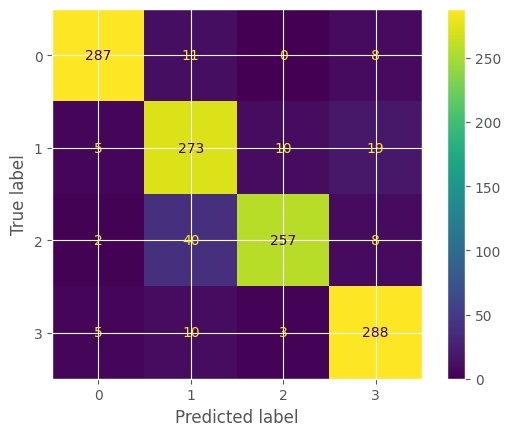

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['lr_tv'].predict(test_tv)))

disp.plot()
plt.show()

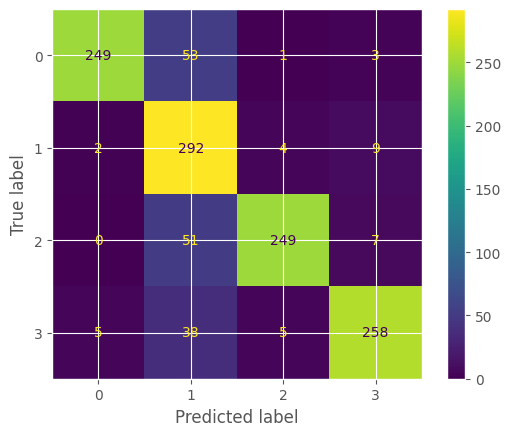

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['lr_bw'].predict(test_bw)))

disp.plot()
plt.show()

По конфьжен матрице пока каких-то конкретных выводов не сделаешь. Однако уже можно заметить, что тип векторизации `bag of words` и `tf-idf` чаще всего путают 1 класс с остальными. Особенно это заметно для `bag of words`, так как кол-во ошибок по другим классам не превышает 10

### SVM

In [ ]:
def LinearSVM_model(train_data, train_labels, param):
  lsv = LinearSVC(random_state=42)
  gs_lsv = GridSearchCV(lsv, param_grid = [param], verbose = 1, cv = kfold,
                        n_jobs = -1, scoring = 'roc_auc')
  gs_lsv.fit(train_data, train_labels)
  print(f'Best params: {gs_lsv.best_params_}')
  return gs_lsv

In [ ]:
lsvm_param = {'loss': ['squared_hinge'],
              'class_weight': [{1:1}, {1:4}],
              'C': [0.001,0.01,0.1,1,10,100,1000]}

In [ ]:
%%time
models['lsvm_tv'] = LinearSVM_model(train_tv, train['class'], lsvm_param)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best params: {'C': 0.001, 'class_weight': {1: 1}, 'loss': 'squared_hinge'}
CPU times: user 1.94 s, sys: 389 ms, total: 2.33 s
Wall time: 4min 33s


In [ ]:
%%time
models['lsvm_bw'] = LinearSVM_model(train_bw, train['class'], lsvm_param)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best params: {'C': 0.001, 'class_weight': {1: 1}, 'loss': 'squared_hinge'}
CPU times: user 652 ms, sys: 66.2 ms, total: 718 ms
Wall time: 1min 4s


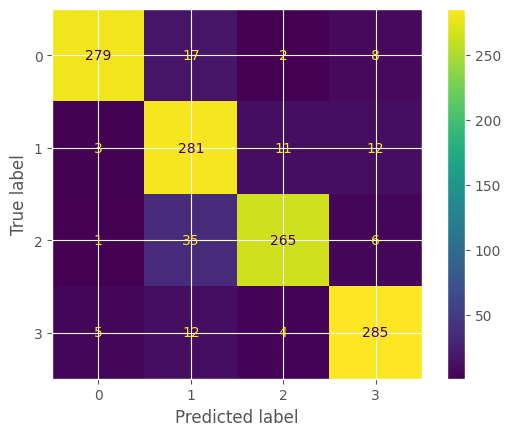

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['lsvm_tv'].predict(test_tv)))

disp.plot()
plt.show()

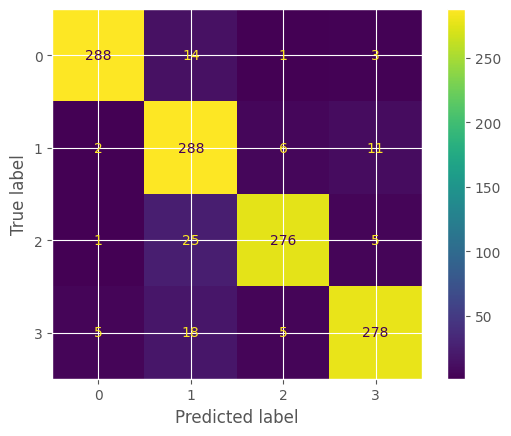

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['lsvm_bw'].predict(test_bw)))

disp.plot()
plt.show()

Тенденция аналогична предыдущей модели, но тут уже ошибки происходят реже, чем в логистической регресии

### Naive Bayes

#### Bernoulli Naive Bayes

In [ ]:
def BNB_model(train_data, train_labels, param):

  bnb = BernoulliNB()
  gs_bnb = GridSearchCV(bnb, param_grid = [param], verbose = 1, cv = kfold,
                        n_jobs = -1, scoring = "roc_auc")
  gs_bnb.fit(train_data, train_labels)
  gs_bnb_best = gs_bnb.best_estimator_
  print(f'Best params: {gs_bnb.best_params_}')
  return gs_bnb

In [ ]:
bnb_param = {'alpha': [0, 0.001, 0.1, 10],
             'binarize': [None, 0.001, 0.1, 10]}

In [ ]:
%%time
models['bnb_tv'] = BNB_model(train_tv, train['class'], bnb_param)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params: {'alpha': 0, 'binarize': None}
CPU times: user 143 ms, sys: 19.9 ms, total: 163 ms
Wall time: 4.09 s


In [ ]:
%%time
models['bnb_bw'] = BNB_model(train_bw, train['class'], bnb_param)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params: {'alpha': 0, 'binarize': None}
CPU times: user 97.1 ms, sys: 10.9 ms, total: 108 ms
Wall time: 2.06 s


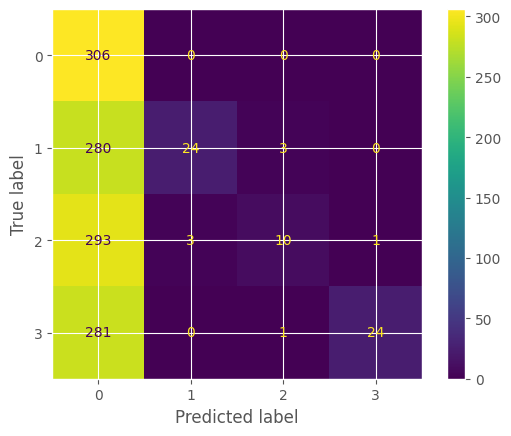

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['bnb_tv'].predict(test_tv)))

disp.plot()
plt.show()

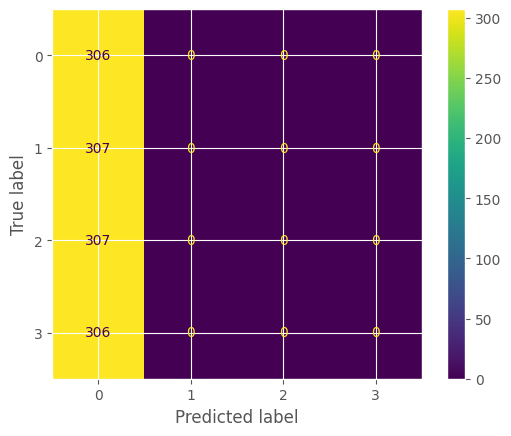

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['bnb_bw'].predict(test_bw)))

disp.plot()
plt.show()

Тут же картина куда печальнее, так как обычный наивный Байес все относит к 0 классу - классу `Автомобили`

#### Multinomial Naive Bayes

In [ ]:
def MNB_model(train_data, train_labels, param):
  mnb = MultinomialNB()
  gs_mnb = GridSearchCV(mnb, param_grid = [param], verbose = 1, cv = kfold,
                        n_jobs = -1, scoring = "roc_auc")
  gs_mnb.fit(train_data, train_labels)
  print(f'Best params: {gs_mnb.best_params_}')
  return gs_mnb

In [ ]:
mnb_params = {'alpha': [0.001, 0.1, 0.2, 1, 10, 100],
          'fit_prior': [True, False]}

In [ ]:
%%time
models['mnb_tv'] = MNB_model(train_tv, train['class'], mnb_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'alpha': 0.001, 'fit_prior': True}
CPU times: user 75.8 ms, sys: 17.5 ms, total: 93.3 ms
Wall time: 1.69 s


In [ ]:
%%time
models['mnb_bw'] = MNB_model(train_bw, train['class'], mnb_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'alpha': 0.001, 'fit_prior': True}
CPU times: user 67.4 ms, sys: 8.9 ms, total: 76.3 ms
Wall time: 1.1 s


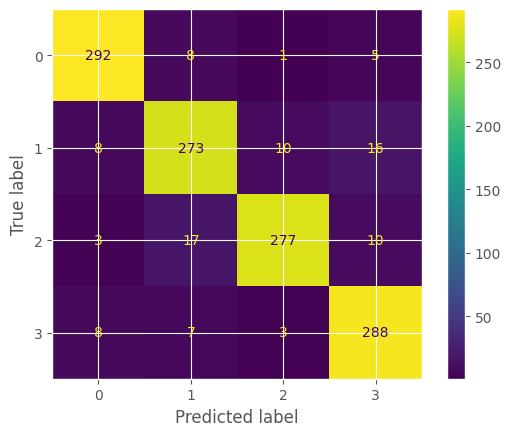

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['mnb_tv'].predict(test_tv)))

disp.plot()
plt.show()

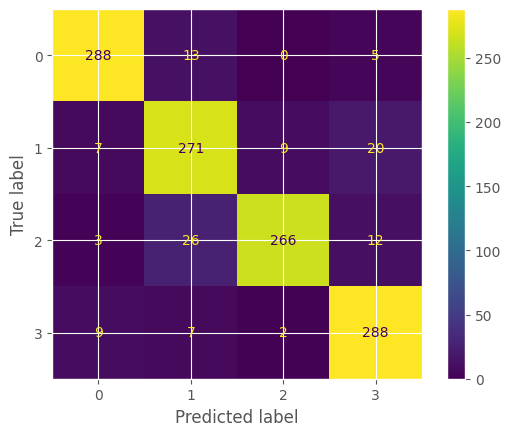

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['mnb_bw'].predict(test_bw)))

disp.plot()
plt.show()

Многочленный наивный Байес уже показывает лучшие результаты относительно обычного наивного Байесовского классификатора. Кол-во ошибок даже меньше, чем у SVM модели, что делает ее на текущий момент самой точной

### SGD

In [ ]:
def SGD_model(train_data, train_labels, param):
  sgd = SGDClassifier()
  gs_sgd = GridSearchCV(sgd, param_grid = [param], verbose = 1, cv = kfold,
                        n_jobs = -1, scoring = "roc_auc")
  gs_sgd.fit(train_data, train_labels)
  gs_sgd_best = gs_sgd.best_estimator_
  print(f'Best params: {gs_sgd.best_params_}')
  return gs_sgd

In [ ]:
sgd_params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

In [ ]:
%%time
models['sgd_tv'] = SGD_model(train_tv, train['class'], sgd_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
CPU times: user 1.02 s, sys: 71.5 ms, total: 1.09 s
Wall time: 58.7 s


In [ ]:
%%time
models['sgd_bw'] = SGD_model(train_bw, train['class'], sgd_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
CPU times: user 3.18 s, sys: 499 ms, total: 3.67 s
Wall time: 8min 19s


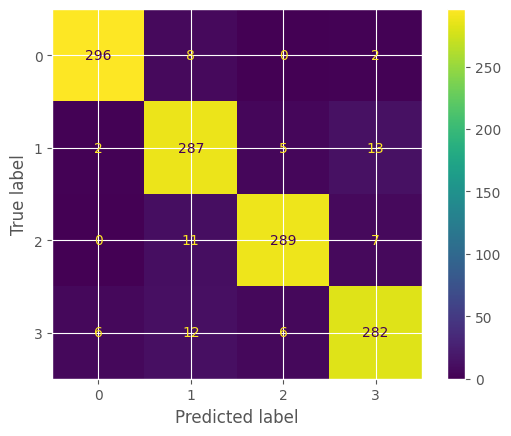

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['sgd_tv'].predict(test_tv)))

disp.plot()
plt.show()

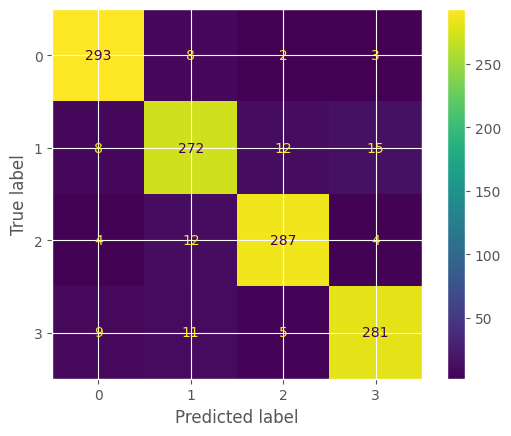

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['sgd_bw'].predict(test_bw)))

disp.plot()
plt.show()

На основе предыдущих моделей можно сказать, что на текущий момент это самая точная модель, которая совершает меньше ошибок, относительно тех, которые представлены в отчете. Но также наблюдается больше всего проблемы с классом 1

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_model(train_data, train_labels, param):
    neigh = KNeighborsClassifier()
    gs_sgd = GridSearchCV(neigh, param_grid = [param], verbose = 1, cv = kfold,
                        n_jobs = -1, scoring = "roc_auc")
    gs_sgd.fit(train_data, train_labels)
    gs_sgd_best = gs_sgd.best_estimator_
    print(f'Best params: {gs_sgd.best_params_}')
    return gs_sgd

In [ ]:
knn_params = {
    "n_neighbors" : [2, 3, 6],
}

In [ ]:
%%time
models['knn_tv'] = KNN_model(train_tv, train['class'], knn_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'n_neighbors': 2}
CPU times: user 54.6 ms, sys: 10.4 ms, total: 65 ms
Wall time: 1.96 s


In [ ]:
%%time
models['knn_bw'] = KNN_model(train_bw, train['class'], knn_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'n_neighbors': 2}
CPU times: user 49 ms, sys: 9.64 ms, total: 58.6 ms
Wall time: 1.95 s


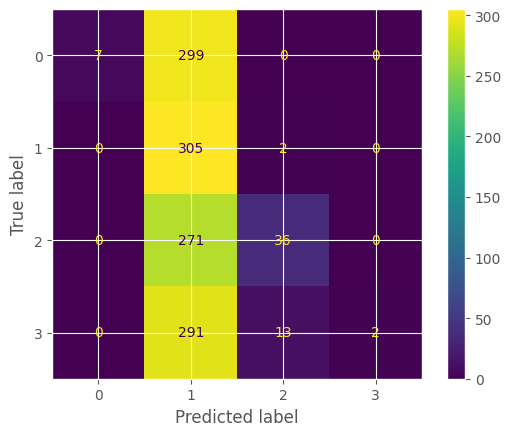

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['knn_tv'].predict(test_tv)))

disp.plot()
plt.show()

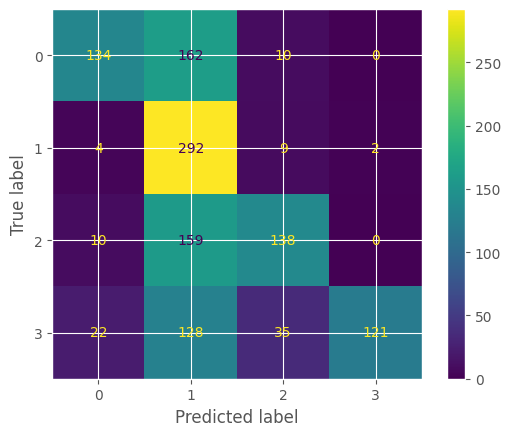

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['knn_bw'].predict(test_bw)))

disp.plot()
plt.show()

Модель классификации k ближайших соседей выдает достаточно плохие результаты, так как для `tf-idf` мы получили, что все статьи относятся к 1 классу. А для `bag of words` получаем приблизительно аналогичный результат - модель часто путает 1 класс с остальными, но и при этом все же может правильно классифицировать

### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


def TREE_model(train_data, train_labels, param):
    tree = DecisionTreeClassifier(random_state=0)
    gs_sgd = GridSearchCV(tree, param_grid = [param], verbose = 1, cv = kfold,
                        n_jobs = -1, scoring = "roc_auc")
    gs_sgd.fit(train_data, train_labels)
    gs_sgd_best = gs_sgd.best_estimator_
    print(f'Best params: {gs_sgd.best_params_}')
    return gs_sgd

In [ ]:
tree_params = {
    "max_depth" : [None, 5, 10, 15],
}

In [ ]:
%%time
models['tree_tv'] = TREE_model(train_tv, train['class'], tree_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'max_depth': None}
CPU times: user 4.25 s, sys: 47.3 ms, total: 4.29 s
Wall time: 41.1 s


In [ ]:
%%time
models['tree_bw'] = TREE_model(train_bw, train['class'], tree_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'max_depth': None}
CPU times: user 1.58 s, sys: 15 ms, total: 1.6 s
Wall time: 14.4 s


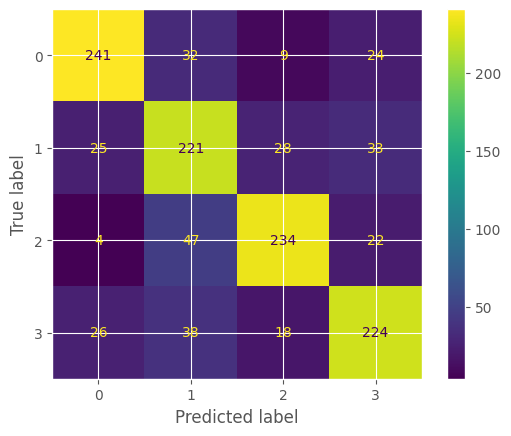

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['tree_tv'].predict(test_tv)))

disp.plot()
plt.show()

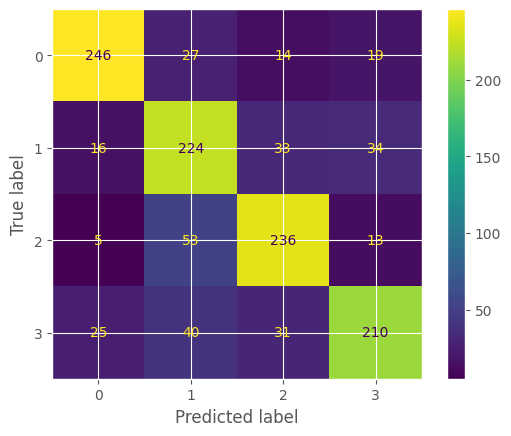

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test['class'], models['tree_bw'].predict(test_bw)))

disp.plot()
plt.show()

На основе матриц для модели решающих деревьев можно сказать, что она достаточно часто совершает ошибки, но при этом все же не относит все к одному конкретному классу

### Сравнение моделей

Теперь же сравним не просто наглядно по конфьюжен матрице, а будем смотреть уже на полученные метрики по каждой из модели, в качестве метрик будем использовать: `precision`, `recall` и `f1-score`

In [ ]:
def clf_report(model, test_features, title):
  y_pred = model.predict(test_features)
  print(f'MODEL: {title}')
  print(classification_report(test['class'], y_pred))

Результаты для `TF-IDF`

In [ ]:
for model in models:
  if model[-2:] == 'tv':
    display(clf_report(models[model], test_tv, f'{model[:-3]} on tf-idf'))

MODEL: lr on tf-idf
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       306
           1       0.82      0.89      0.85       307
           2       0.95      0.84      0.89       307
           3       0.89      0.94      0.92       306

    accuracy                           0.90      1226
   macro avg       0.91      0.90      0.90      1226
weighted avg       0.91      0.90      0.90      1226



None

MODEL: lsvm on tf-idf
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       306
           1       0.81      0.92      0.86       307
           2       0.94      0.86      0.90       307
           3       0.92      0.93      0.92       306

    accuracy                           0.91      1226
   macro avg       0.91      0.91      0.91      1226
weighted avg       0.91      0.91      0.91      1226



None

MODEL: bnb on tf-idf
              precision    recall  f1-score   support

           0       0.26      1.00      0.42       306
           1       0.89      0.08      0.14       307
           2       0.71      0.03      0.06       307
           3       0.96      0.08      0.15       306

    accuracy                           0.30      1226
   macro avg       0.71      0.30      0.19      1226
weighted avg       0.71      0.30      0.19      1226



None

MODEL: mnb on tf-idf
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       306
           1       0.90      0.89      0.89       307
           2       0.95      0.90      0.93       307
           3       0.90      0.94      0.92       306

    accuracy                           0.92      1226
   macro avg       0.92      0.92      0.92      1226
weighted avg       0.92      0.92      0.92      1226



None

MODEL: sgd on tf-idf
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       306
           1       0.90      0.93      0.92       307
           2       0.96      0.94      0.95       307
           3       0.93      0.92      0.92       306

    accuracy                           0.94      1226
   macro avg       0.94      0.94      0.94      1226
weighted avg       0.94      0.94      0.94      1226



None

MODEL: knn on tf-idf
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       306
           1       0.26      0.99      0.41       307
           2       0.71      0.12      0.20       307
           3       1.00      0.01      0.01       306

    accuracy                           0.29      1226
   macro avg       0.74      0.29      0.17      1226
weighted avg       0.74      0.29      0.17      1226



None

MODEL: tree on tf-idf
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       306
           1       0.65      0.72      0.69       307
           2       0.81      0.76      0.79       307
           3       0.74      0.73      0.74       306

    accuracy                           0.75      1226
   macro avg       0.75      0.75      0.75      1226
weighted avg       0.75      0.75      0.75      1226



None

**Лучшие модели**: SGD и Multinomial Naive Bayes показывают наивысшие показатели точности, полноты и F1-меры.

**Худшие модели**: Bernoulli Naive Bayes и K-Nearest Neighbors имеют очень низкие показатели, что делает их непригодными для данной задачи.

Но все же самой лучшей моделью в представленном отчете для `tf-idf` по accuracy (0.94) - SGD с параметрами {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}

Результаты для `Bag of Words`

In [ ]:
for model in models:
  if model[-2:] == 'bw':
    display(clf_report(models[model], test_bw, f'{model[:-3]} on bw'))

MODEL: lr on bw
              precision    recall  f1-score   support

           0       0.97      0.81      0.89       306
           1       0.67      0.95      0.79       307
           2       0.96      0.81      0.88       307
           3       0.93      0.84      0.89       306

    accuracy                           0.85      1226
   macro avg       0.88      0.85      0.86      1226
weighted avg       0.88      0.85      0.86      1226



None

MODEL: lsvm on bw
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       306
           1       0.83      0.94      0.88       307
           2       0.96      0.90      0.93       307
           3       0.94      0.91      0.92       306

    accuracy                           0.92      1226
   macro avg       0.93      0.92      0.92      1226
weighted avg       0.93      0.92      0.92      1226



None

MODEL: bnb on bw
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       306
           1       0.00      0.00      0.00       307
           2       0.00      0.00      0.00       307
           3       0.00      0.00      0.00       306

    accuracy                           0.25      1226
   macro avg       0.06      0.25      0.10      1226
weighted avg       0.06      0.25      0.10      1226



None

MODEL: mnb on bw
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       306
           1       0.85      0.88      0.87       307
           2       0.96      0.87      0.91       307
           3       0.89      0.94      0.91       306

    accuracy                           0.91      1226
   macro avg       0.91      0.91      0.91      1226
weighted avg       0.91      0.91      0.91      1226



None

MODEL: sgd on bw
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       306
           1       0.90      0.89      0.89       307
           2       0.94      0.93      0.94       307
           3       0.93      0.92      0.92       306

    accuracy                           0.92      1226
   macro avg       0.92      0.92      0.92      1226
weighted avg       0.92      0.92      0.92      1226



None

MODEL: knn on bw
              precision    recall  f1-score   support

           0       0.79      0.44      0.56       306
           1       0.39      0.95      0.56       307
           2       0.72      0.45      0.55       307
           3       0.98      0.40      0.56       306

    accuracy                           0.56      1226
   macro avg       0.72      0.56      0.56      1226
weighted avg       0.72      0.56      0.56      1226



None

MODEL: tree on bw
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       306
           1       0.65      0.73      0.69       307
           2       0.75      0.77      0.76       307
           3       0.76      0.69      0.72       306

    accuracy                           0.75      1226
   macro avg       0.75      0.75      0.75      1226
weighted avg       0.75      0.75      0.75      1226



None

**Лучшие модели**: Linear SVM, Multinomial Naive Bayes и SGD показывают наивысшие показатели точности, полноты и F1-меры.

**Худшие модели**: Bernoulli Naive Bayes и K-Nearest Neighbors имеют очень низкие показатели, что делает их непригодными для данной задачи.

И все же лучшая модель для `bag of words` в представленном отчете по accuracy (0.93) - LSVM с параметрами {'C': 0.001, 'class_weight': {1: 1}, 'loss': 'squared_hinge'}